# KMeans Clustering For Mall Data

In [24]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

## Exploring The Data

In [25]:
# read in data 
data = pd.read_csv('Mall_Customers.csv')

In [26]:
# view and analyse the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [27]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Cleaning The Data

In [29]:
# drop unnecessary columns
data.drop('CustomerID', axis=1)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


## Model

In [30]:
# create data sets for visualisation
X = data.drop(['Genre'], axis = 1)
y = data['Genre']

In [31]:
# use elbow method to find optimal clusters
wcss = []

for i in range(1, 13):
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

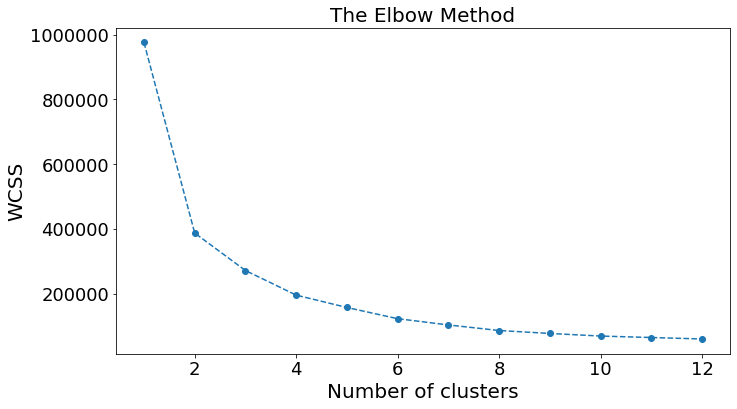

In [32]:
# plotting the graph
plt.figure(figsize=(11,6))
plt.plot(range(1,13),wcss, linestyle='--', marker='o')
plt.title('The Elbow Method', fontsize =20)
plt.xlabel('Number of clusters', fontsize=20)
plt.ylabel('WCSS', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('elbow.png')
plt.show()

In [33]:
# fitting the k means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 10).fit(X)
clusts = kmeans.fit_predict(X)

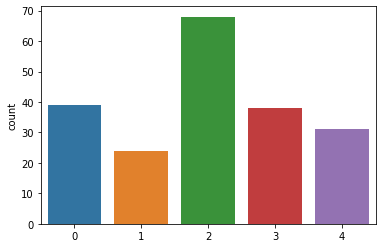

In [34]:
# the number of points in each cluster
sns.countplot(clusts)

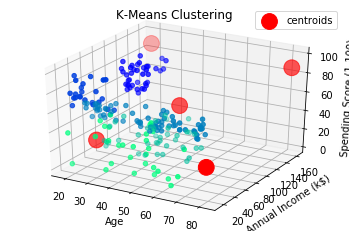

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(kmeans.cluster_centers_[:, 3],
            kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 2],
            s = 250,
            marker='o',
            c='red',
            label='centroids')
scatter = ax.scatter(data['Age'],data['Annual Income (k$)'], data['Spending Score (1-100)'],
                     c=clusts,s=20, cmap='winter')


ax.set_title('K-Means Clustering')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.savefig('cluster.png')
plt.show()